In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("dataset/synthetic_logs.csv")
df.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


In [8]:
print(df.source.unique())
print(df.target_label.unique())

['ModernCRM' 'AnalyticsEngine' 'ModernHR' 'BillingSystem' 'ThirdPartyAPI'
 'LegacyCRM']
['HTTP Status' 'Critical Error' 'Security Alert' 'Error'
 'System Notification' 'Resource Usage' 'User Action' 'Workflow Error'
 'Deprecation Warning']


In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN

# Load a pre-trained sentence transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Ensure the 'log_message' column exists and is of string type
if "log_message" in df.columns:
    df["log_message"] = df["log_message"].astype(str)  # Handle non-string entries gracefully
    
    # Encode text data into dense vector embeddings
    embeddings = model.encode(df["log_message"].tolist(), show_progress_bar=True, convert_to_numpy=True)
else:
    raise KeyError("Column 'log_message' not found in DataFrame.")


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DELL\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Batches: 100%|██████████| 76/76 [01:09<00:00,  1.10it/s]


In [10]:
embeddings[:2]

array([[-1.02939621e-01,  3.35459411e-02, -2.20260732e-02,
         1.55101740e-03, -9.86917876e-03, -1.78956270e-01,
        -6.34409785e-02, -6.01761639e-02,  2.81109158e-02,
         5.99620491e-02, -1.72618348e-02,  1.43363548e-03,
        -1.49560034e-01,  3.15287686e-03, -5.66030927e-02,
         2.71685235e-02, -1.49891041e-02, -3.54037657e-02,
        -3.62936445e-02, -1.45410765e-02, -5.61491773e-03,
         8.75539035e-02,  4.55120578e-02,  2.50963885e-02,
         1.00187510e-02,  1.24267349e-02, -1.39923573e-01,
         7.68696293e-02,  3.14095505e-02, -4.15247958e-03,
         4.36902344e-02,  1.71250012e-02, -8.00951198e-02,
         5.74006326e-02,  1.89091656e-02,  8.55262503e-02,
         3.96398641e-02, -1.34371817e-01, -1.44360063e-03,
         3.06704035e-03,  1.76854044e-01,  4.44885530e-03,
        -1.69274509e-02,  2.24266481e-02, -4.35049310e-02,
         6.09034160e-03, -9.98169929e-03, -6.23972900e-02,
         1.07372422e-02, -6.04895083e-03, -7.14660808e-0

In [12]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with cosine distance
# Note: the correct parameter is 'metric' (not 'metrics') and 'min_samples' (not 'min_sample')
dbscan = DBSCAN(eps=0.2, min_samples=1, metric="cosine")

# Fit the DBSCAN model on the embeddings
clusters = dbscan.fit(embeddings)


In [13]:
# Assign cluster labels to the DataFrame
df["cluster"] = clusters.labels_

# Display the first few rows to inspect results
df.head()


,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0


In [14]:
from sklearn.metrics import silhouette_score

# Only compute silhouette score if there are at least 2 clusters (excluding noise)
n_clusters = len(set(clusters.labels_)) - (1 if -1 in clusters.labels_ else 0)

if n_clusters > 1:
    score = silhouette_score(embeddings, clusters.labels_, metric="cosine")
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette score not applicable: fewer than 2 clusters found.")


Silhouette Score: 0.6228


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_7300\2969688351.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


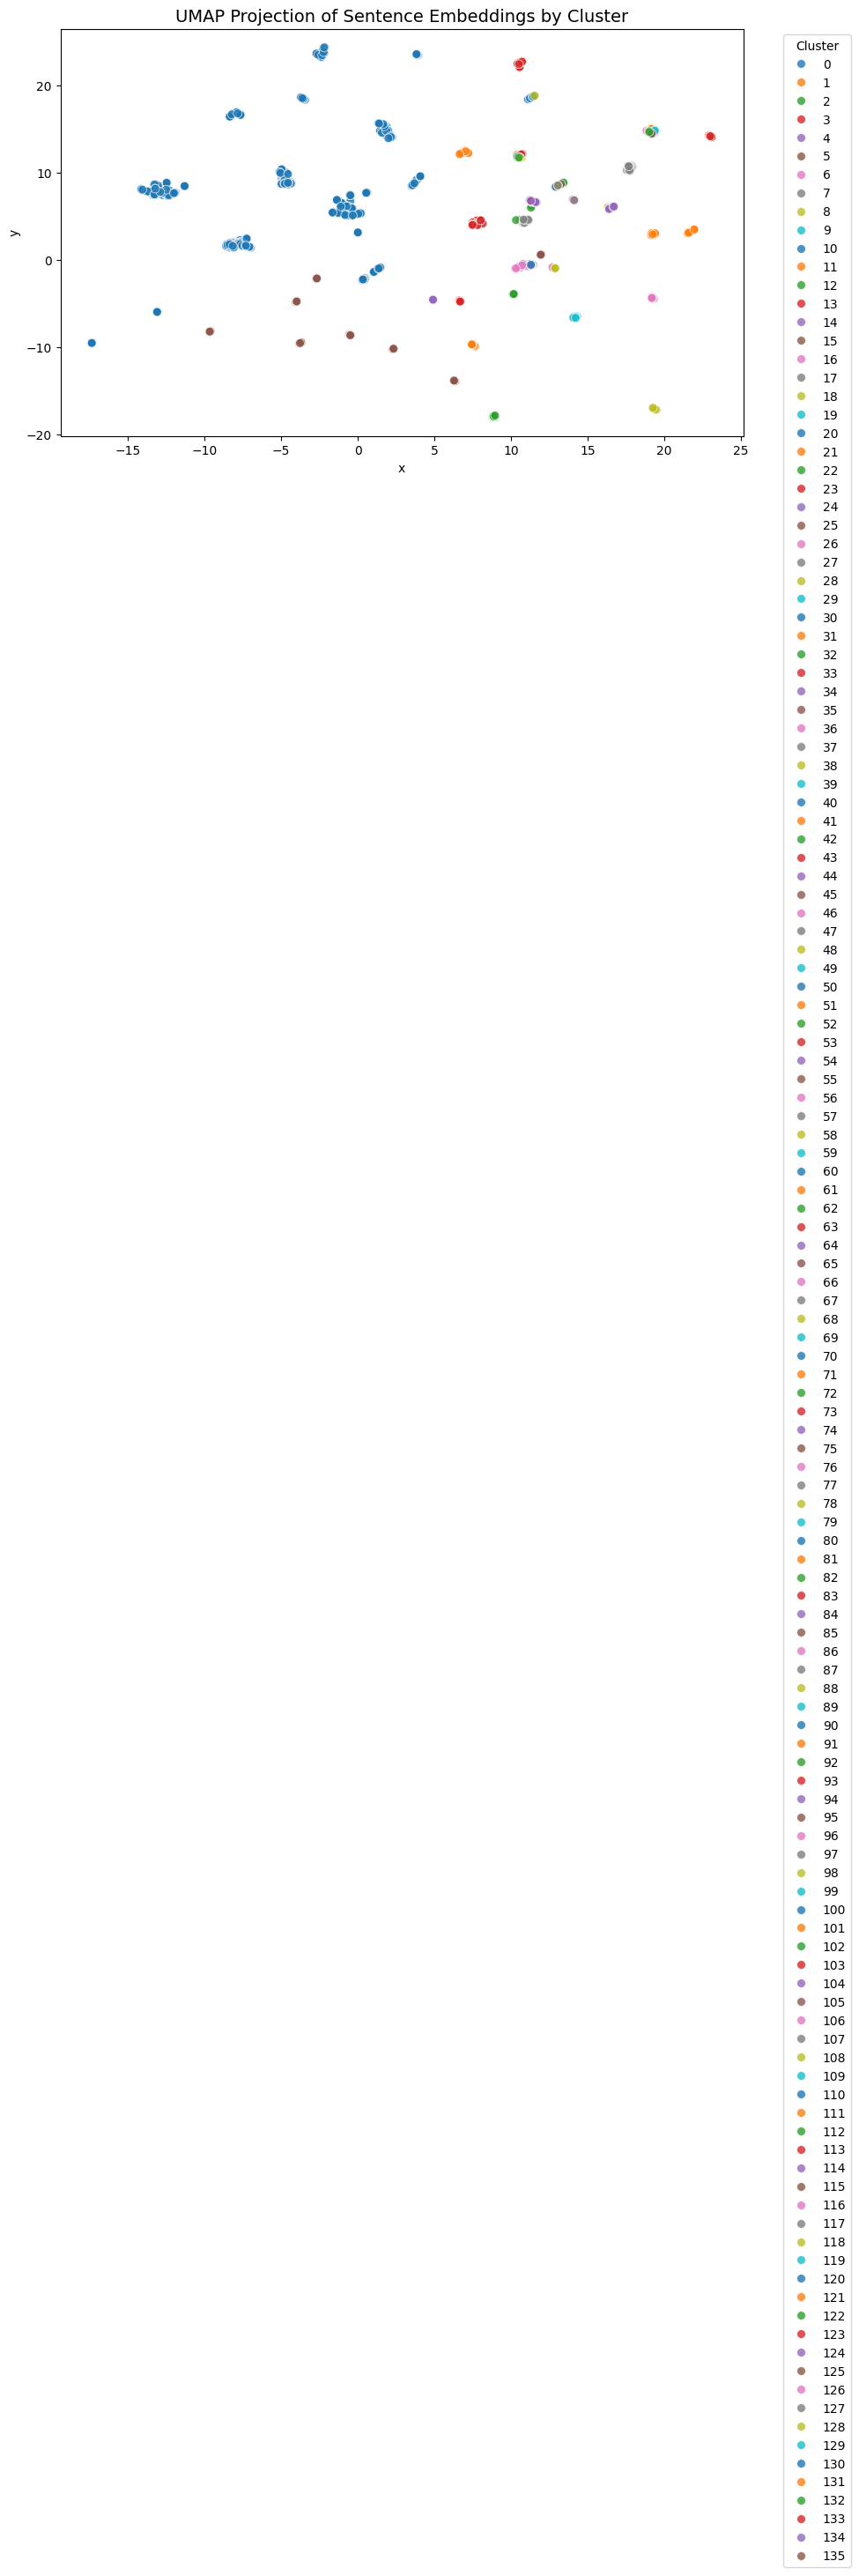

In [17]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce embeddings to 2D for visualization
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    "x": embedding_2d[:, 0],
    "y": embedding_2d[:, 1],
    "cluster": df["cluster"].astype(str)  # Convert for categorical coloring
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="x", y="y", hue="cluster", palette="tab10", s=50, alpha=0.8)
plt.title("UMAP Projection of Sentence Embeddings by Cluster", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
df[df["cluster"] == 1]

,timestamp,source,log_message,target_label,complexity,cluster
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
10,8/9/2025 18:58,ModernCRM,Email server encountered a sending fault,Error,bert,1
217,1/22/2025 5:45,BillingSystem,Mail service encountered a delivery glitch,Error,bert,1
248,5/2/2025 23:04,ModernHR,Service disruption caused by email sending error,Critical Error,bert,1
265,3/30/2025 23:53,ModernCRM,Email system had a problem sending emails,Error,bert,1
361,11/19/2025 23:06,BillingSystem,Email service experienced a sending issue,Error,bert,1
450,10/27/2025 5:59,ThirdPartyAPI,Email delivery system encountered an error,Error,bert,1
477,12/2/2025 10:30,AnalyticsEngine,Email transmission error caused service impact,Critical Error,bert,1
570,11/7/2025 18:08,ThirdPartyAPI,Email service impacted by sending failure,Critical Error,bert,1
678,4/28/2025 15:13,AnalyticsEngine,Email delivery problem affected system,Critical Error,bert,1


In [19]:
# Count how many entries are in each cluster
cluster_counts = df["cluster"].value_counts()

# Get clusters with more than 10 samples
large_clusters = cluster_counts[cluster_counts > 10].index

# Display the top 5 log messages for each large cluster
for cluster in large_clusters:
    print(f"\n Cluster {cluster} (Size: {cluster_counts[cluster]}):")
    print(df[df["cluster"] == cluster]["log_message"].head(5).to_string(index=False))



 Cluster 0 (Size: 1017):
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...

 Cluster 5 (Size: 147):
nova.compute.claims [req-a07ac654-8e81-416d-bfb...
nova.compute.claims [req-d6986b54-3735-4a42-907...
nova.compute.claims [req-72b4858f-049e-49e1-b31...
nova.compute.claims [req-5c8f52bd-8e3c-41f0-95a...
nova.compute.claims [req-d38f479d-9bb9-4276-968...

 Cluster 11 (Size: 100):
User User685 logged out.
 User User395 logged in.
 User User225 logged in.
User User494 logged out.
 User User900 logged in.

 Cluster 13 (Size: 86):
Backup started at 2025-05-14 07:06:55.
Backup started at 2025-02-15 20:00:19.
  Backup ended at 2025-08-08 13:06:23.
Backup started at 2025-11-14 08:27:43.
Backup started at 2025-12-09 10:19:11.

 Cluster 7 (Size: 60):
Multiple bad login attempts detected on user

In [20]:
import re

def classify_with_regex(log_message):
    """
    Classifies a log message using regex patterns to determine its category.
    Returns a string label if matched, otherwise None.
    """
    regex_patterns = {
        # User Actions
        r"User User\d+ logged (in|out)\.": "User Action",
        r"User .* changed password successfully\.": "User Action",
        r"User .* attempted unauthorized access\.": "User Action",
        r"User .* updated profile information\.": "User Action",
        r"Account with ID .*": "User Action",
        r"User .* deleted account .*": "User Action",
        r"User .* reset MFA settings\.": "User Action",
    
        # System Notifications
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully\.": "System Notification",
        r"System Updated to version .*": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Disk cleanup completed successfully\.": "System Notification",
        r"File .* uploaded successfully.*": "System Notification",
        r"New device registered: .*": "System Notification",
        r"Maintenance scheduled for .*": "System Notification",
        r"Server .* is back online\.": "System Notification",
        r"Security patch applied successfully\.": "System Notification",
        r"Resource usage exceeded threshold.*": "System Notification",
    }

    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message, re.IGNORECASE):
            return label
    return "Unclassified"


In [21]:
# Apply regex-based classification to each log message
df["regex_label"] = df["log_message"].apply(classify_with_regex)

df["regex_label"].isnull().sum()

np.int64(0)

In [22]:
# Extract logs that were not matched by any regex pattern
df_non_regex = df[df["regex_label"] == "Unclassified"].copy()

In [23]:
# Identify rare target labels (appearing 5 times or fewer) within unmatched logs
rare_labels = df_non_regex["target_label"].value_counts()
rare_labels = rare_labels[rare_labels <= 5].index.tolist()

print(rare_labels)

['Workflow Error', 'Deprecation Warning']


In [24]:
# Filter out entries from source 'LegacyCRM'
df_non_legacy = df_non_regex[df_non_regex["source"] != "LegacyCRM"]

# View the unique sources remaining in the filtered DataFrame
print(df_non_legacy["source"].unique())

['ModernCRM' 'AnalyticsEngine' 'ModernHR' 'BillingSystem' 'ThirdPartyAPI']


In [25]:
# Encode the log messages from non-legacy sources using the sentence transformer
filter_embeddings = model.encode(
    df_non_legacy["log_message"].astype(str).tolist(),
    show_progress_bar=True,
    convert_to_numpy=True
)

Batches: 100%|██████████| 60/60 [00:59<00:00,  1.00it/s]


In [26]:
filter_embeddings[:2]

array([[-1.02939621e-01,  3.35459411e-02, -2.20260732e-02,
         1.55101740e-03, -9.86917876e-03, -1.78956270e-01,
        -6.34409785e-02, -6.01761639e-02,  2.81109158e-02,
         5.99620491e-02, -1.72618348e-02,  1.43363548e-03,
        -1.49560034e-01,  3.15287686e-03, -5.66030927e-02,
         2.71685235e-02, -1.49891041e-02, -3.54037657e-02,
        -3.62936445e-02, -1.45410765e-02, -5.61491773e-03,
         8.75539035e-02,  4.55120578e-02,  2.50963885e-02,
         1.00187510e-02,  1.24267349e-02, -1.39923573e-01,
         7.68696293e-02,  3.14095505e-02, -4.15247958e-03,
         4.36902344e-02,  1.71250012e-02, -8.00951198e-02,
         5.74006326e-02,  1.89091656e-02,  8.55262503e-02,
         3.96398641e-02, -1.34371817e-01, -1.44360063e-03,
         3.06704035e-03,  1.76854044e-01,  4.44885530e-03,
        -1.69274509e-02,  2.24266481e-02, -4.35049310e-02,
         6.09034160e-03, -9.98169929e-03, -6.23972900e-02,
         1.07372422e-02, -6.04895083e-03, -7.14660808e-0

In [27]:
# Assign features and target labels
X = filter_embeddings
y = df_non_legacy["target_label"]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [29]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize and train a logistic regression classifier
clf = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Display a detailed classification report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Critical Error       1.00      1.00      1.00        32
         Error       1.00      1.00      1.00        36
   HTTP Status       1.00      1.00      1.00       204
Resource Usage       1.00      1.00      1.00        35
Security Alert       1.00      1.00      1.00        74

      accuracy                           1.00       381
     macro avg       1.00      1.00      1.00       381
  weighted avg       1.00      1.00      1.00       381



In [30]:
from sklearn.metrics import classification_report, accuracy_score

# Train performance
train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)
print("Training Classification Report:\n", classification_report(y_train, train_pred))

# Test performance
test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print("\n Test Accuracy:", test_acc)
print(" Test Classification Report:\n", classification_report(y_test, test_pred))

# Overfitting Indicator
delta = train_acc - test_acc
print(f"\n Overfitting Risk Score (Δ Accuracy): {delta:.4f}")
if delta > 0.15:
    print(" Potential Overfitting Detected!")
elif delta > 0.05:
    print(" Mild Overfitting. Consider regularization or more data.")
else:
    print(" No significant overfitting detected.")


Training Accuracy: 0.9980289093298291
Training Classification Report:
                 precision    recall  f1-score   support

Critical Error       0.99      0.99      0.99       129
         Error       0.99      0.99      0.99       141
   HTTP Status       1.00      1.00      1.00       813
Resource Usage       1.00      1.00      1.00       142
Security Alert       1.00      1.00      1.00       297

      accuracy                           1.00      1522
     macro avg       1.00      1.00      1.00      1522
  weighted avg       1.00      1.00      1.00      1522


 Test Accuracy: 1.0
 Test Classification Report:
                 precision    recall  f1-score   support

Critical Error       1.00      1.00      1.00        32
         Error       1.00      1.00      1.00        36
   HTTP Status       1.00      1.00      1.00       204
Resource Usage       1.00      1.00      1.00        35
Security Alert       1.00      1.00      1.00        74

      accuracy                   

In [31]:
import joblib
import os

# Ensure the model directory exists
os.makedirs("../models", exist_ok=True)

# Save the trained classifier
joblib.dump(clf, "../models/log_classifier.joblib")

['../models/log_classifier.joblib']